In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [2]:
# Fetch the dataset
energy_efficiency = fetch_ucirepo(id=242)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [3]:
# Assuming the metadata doesn't have feature and target names
# Let's create generic names if they don't exist
feature_names = [f'X{i+1}' for i in range(X.shape[1])]
target_names = ['Y1', 'Y2'] if y.shape[1] > 1 else ['Y1']

In [4]:
# Convert features and targets into a DataFrame
df = pd.DataFrame(data=X, columns=feature_names)
for i, target_name in enumerate(target_names):
    df[target_name] = y[:, i]

InvalidIndexError: (slice(None, None, None), 0)

In [5]:
# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0


In [7]:
# Compute the correlation matrix
correlation_matrix = df.corr()

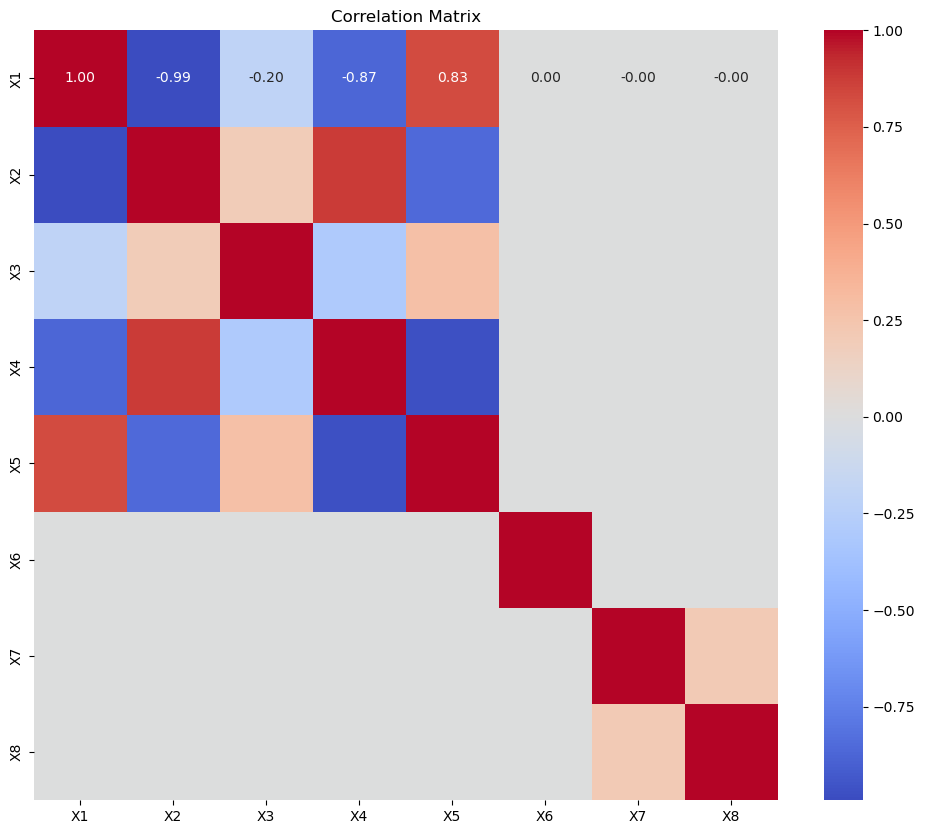

In [11]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: Could not interpret input 'Y1'

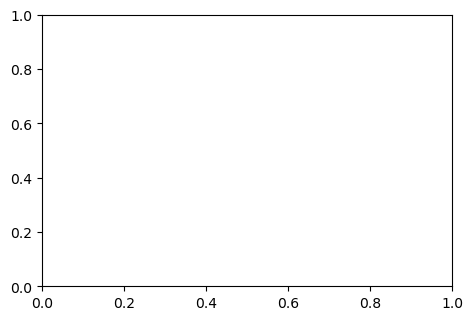

In [12]:
# Visualize relationships between each feature and the target (Y1)
plt.figure(figsize=(18, 12))
for i, feature in enumerate(feature_names, start=1):
    plt.subplot(3, 3, i)  # Adjust subplot grid as necessary
    sns.boxplot(x=feature, y='Y1', data=df)
    plt.title(f'Energy Efficiency (Y1) vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Energy Efficiency (Y1)')

plt.tight_layout()
plt.show()

In [13]:
# If you also want to visualize for Y2 (if it exists)
if 'Y2' in df.columns:
    plt.figure(figsize=(18, 12))
    for i, feature in enumerate(feature_names, start=1):
        plt.subplot(3, 3, i)  # Adjust subplot grid as necessary
        sns.boxplot(x=feature, y='Y2', data=df)
        plt.title(f'Energy Efficiency (Y2) vs. {feature}')
        plt.xlabel(feature)
        plt.ylabel('Energy Efficiency (Y2)')

    plt.tight_layout()
    plt.show()